### Nepal Drone Network (NDN)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

-----------

In [3]:
def random_ID(N):
        letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
        numbers = [str(i) for i in range(10)]
        ID = ""
        for k in range(N):
            t = random.choice([0,1])
            if t == 0: ID = ID + random.choice(letters)
            else: ID = ID + random.choice(numbers)
        
        return ID

### This is Pokhara!

In [4]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

#### Random Position

In [5]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [6]:
len(LAT), len(LONG)

(900, 900)

### Generate A random Network

In [7]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 200\nNumber of edges: 919\nAverage degree:   9.1900'

In [9]:
pos = nx.get_node_attributes(G, 'pos')

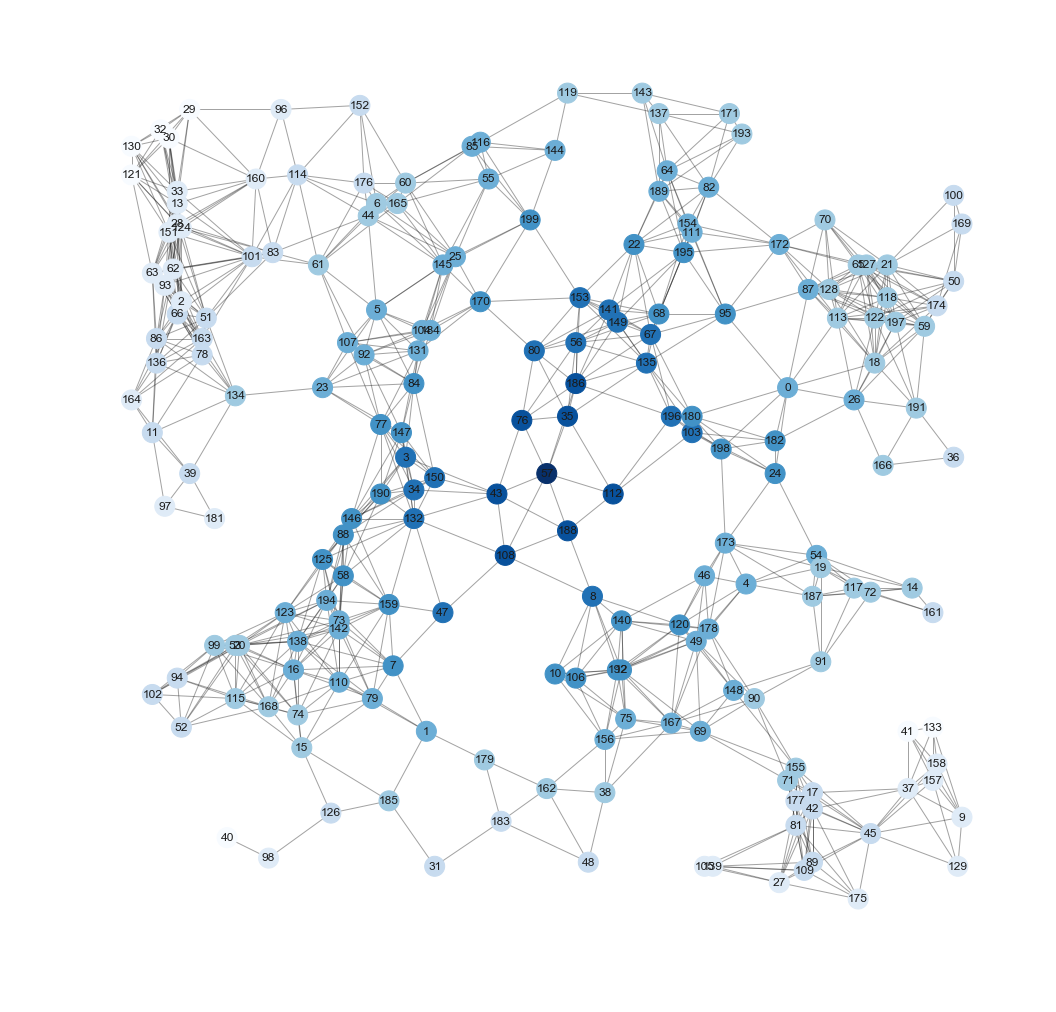

In [10]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Prepare geolocation coordinates

In [11]:
LINE = []
for e in list(G.edges()):
    f = e[0]
    t = e[1]
    LINE.append({"lat":[pos[f][0],pos[t][0]],"long":[pos[f][1],pos[t][1]]})

In [12]:
LAT_node = []
LONG_node = []
for n in list(G.nodes()):
    LAT_node.append(pos[n][0])
    LONG_node.append(pos[n][1])

### Geo Location

In [13]:
# import gmplot package 
import gmplot 
  
gmap3 = gmplot.GoogleMapPlotter(xc,yc, 15) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( LAT_node,LONG_node,'red', size = 100, marker = False ) 
        
# Plot method Draw a line in 
# between given coordinates 

for item in LINE:
    gmap3.plot(item['lat'],item['long'],  
           'cornflowerblue', edge_width = 1.5) 
  

gmap3.draw( "pokhara-lattice.html" ) 

![img](img/pokhara.png)

In [14]:
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])

0 | [180, 182, 87, 198, 18, 113, 24, 95, 26]
1 | [110, 179, 7, 185, 79]
2 | [78, 163, 51, 63, 28, 151, 136, 13, 62, 86, 101, 66, 124, 93]
3 | [147, 190, 77, 88, 34, 43, 146, 84, 150, 132]
4 | [173, 178, 187, 19, 49, 46, 120, 54]
5 | [84, 145, 131, 23, 25, 44, 92, 61, 104, 184, 107]
6 | [176, 145, 61, 165, 25, 60, 44, 114, 152]
7 | [110, 73, 16, 194, 142, 47, 159, 1, 138, 79]
8 | [192, 12, 120, 188, 106, 108, 140, 10]
9 | [37, 157, 41, 129, 158, 45, 133]
10 | [75, 156, 192, 12, 140, 8, 106]
11 | [134, 39, 164, 78, 97, 86, 136]
12 | [69, 8, 10, 156, 167, 120, 49, 140, 192, 106, 178, 75]
13 | [32, 101, 63, 160, 30, 28, 33, 151, 121, 130, 2, 62, 93, 124, 29]
14 | [19, 72, 117, 54, 187, 161]
15 | [74, 79, 110, 168, 126, 16, 115, 185]
16 | [20, 115, 7, 99, 53, 110, 79, 123, 138, 74, 15, 142, 168, 73, 194]
17 | [155, 37, 81, 27, 177, 45, 71, 89, 109, 42]
18 | [128, 197, 122, 65, 174, 127, 118, 0, 87, 113, 26, 191, 21, 59]
19 | [117, 91, 14, 72, 4, 173, 187, 54]
20 | [115, 16, 138, 94, 74, 168